In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras import applications
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Dropout, Flatten, Dense
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import ModelCheckpoint
from tqdm.notebook import tqdm
from sklearn.model_selection import train_test_split
import requests
from PIL import Image
from io import BytesIO
import cv2
import pandas as pd
import numpy as np
import os

In [3]:
foldernames = os.listdir('raw-img/')
foldernames

['Bird',
 'Cat',
 'Chicken',
 'Cow',
 'Dog',
 'Elephant',
 'Fish',
 'Fox',
 'Frog',
 'Giraffe',
 'Horse',
 'Lion',
 'Monkey',
 'Sheep']

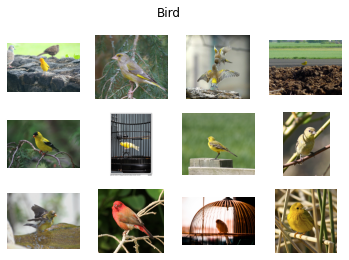

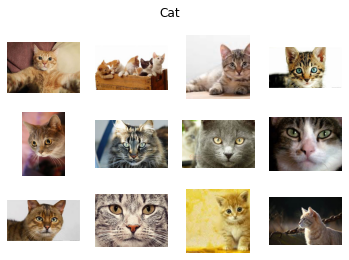

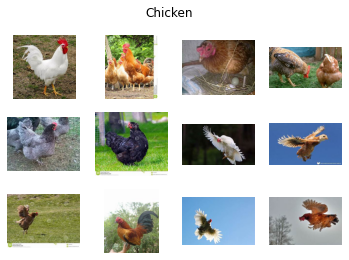

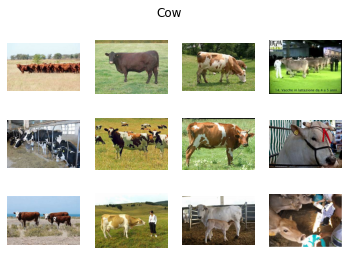

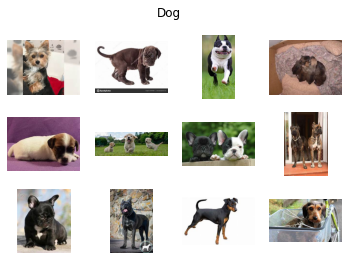

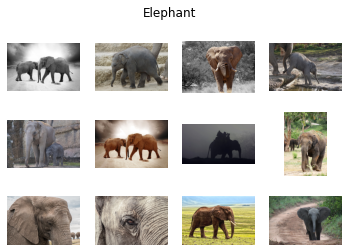

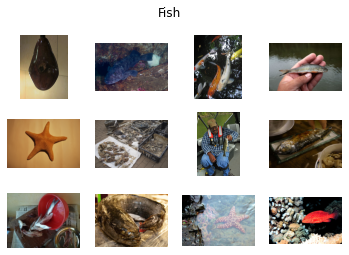

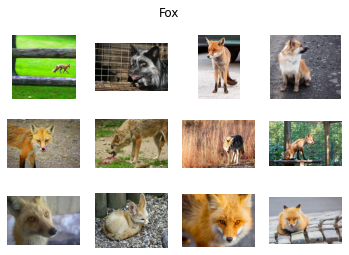

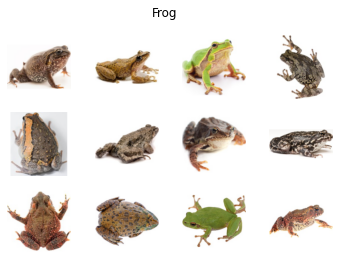

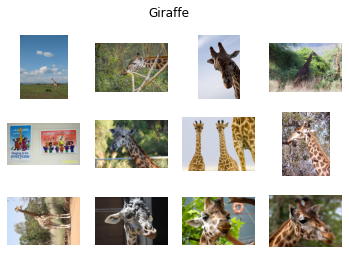

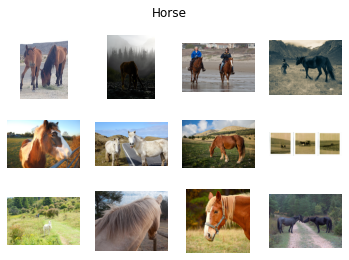

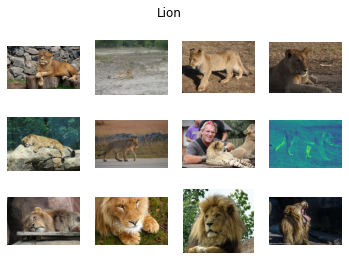

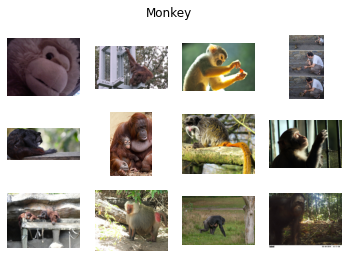

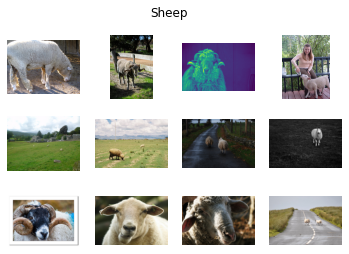

In [4]:
# let's display some of the pictures
path = 'raw-img/'
for category in foldernames:
    fig, _ = plt.subplots(3,4)
    fig.suptitle(category)
    for k, v in enumerate(os.listdir(path+category)[:12]):
        img = plt.imread(path+category+'/'+v)
        plt.subplot(3, 4, k+1)
        plt.axis('off')
        plt.imshow(img)
    plt.show()

In [13]:
print('Dog =',len([iq for iq in os.scandir('raw-img/Dog')]))
print('Cat =',len([iq for iq in os.scandir('raw-img/Cat')]))
print('Horse =',len([iq for iq in os.scandir('raw-img/Horse')]))
print('Cow =',len([iq for iq in os.scandir('raw-img/Cow')]))
print('Sheep =',len([iq for iq in os.scandir('raw-img/Sheep')]))
print('Lyon =',len([iq for iq in os.scandir('raw-img/Lion')]))
print('Bird =',len([iq for iq in os.scandir('raw-img/Bird')]))
print('Frog =',len([iq for iq in os.scandir('raw-img/Frog')]))
print('Chicken =',len([iq for iq in os.scandir('raw-img/Chicken')]))
print('Elephant =',len([iq for iq in os.scandir('raw-img/Elephant')]))
print('Fox =',len([iq for iq in os.scandir('raw-img/Fox')]))
print('Monkey =',len([iq for iq in os.scandir('raw-img/Monkey')]))
print('Giraffe =',len([iq for iq in os.scandir('raw-img/Giraffe')]))
print('Fish =',len([iq for iq in os.scandir('raw-img/Fish')]))

print(len([iq for iq in os.scandir('raw-img/Dog')])+
      len([iq for iq in os.scandir('raw-img/Cat')])+
      len([iq for iq in os.scandir('raw-img/Horse')])+
      len([iq for iq in os.scandir('raw-img/Cow')])+
      len([iq for iq in os.scandir('raw-img/Sheep')])+
      len([iq for iq in os.scandir('raw-img/Lion')])+
      len([iq for iq in os.scandir('raw-img/Bird')])+
      len([iq for iq in os.scandir('raw-img/Frog')])+
      len([iq for iq in os.scandir('raw-img/Chicken')])+
      len([iq for iq in os.scandir('raw-img/Elephant')])+
      len([iq for iq in os.scandir('raw-img/Elephant')])+
      len([iq for iq in os.scandir('raw-img/Fox')])+
      len([iq for iq in os.scandir('raw-img/Monkey')])+
      len([iq for iq in os.scandir('raw-img/Giraffe')])+
      len([iq for iq in os.scandir('raw-img/Fish')])
                                                                                                                                   )

Dog = 4863
Cat = 1668
Horse = 3023
Cow = 1866
Sheep = 1919
Lyon = 208
Bird = 113
Frog = 2967
Chicken = 3098
Elephant = 1446
Fox = 148
Monkey = 770
Giraffe = 298
Fish = 835
24668


In [9]:
len([iq for iq in os.scandir('raw-img/Fish')])

835

In [6]:
translate = {"Bird": "Bird", "Cat": "Cat", "Chicken": "Chicken", "Cow": "Cow", "Dog": "Dog", "Elephant": "Elephant", "Fish": "Fish","Frog":"Frog","Horse":"Horse","Lion":"Lion","Sheep":"Sheep","Giraffe":"Giraffe","Monkey":"Monkey","Fox":"Fox"}

In [7]:
##### Creating Dataframe of images' path #####
# choose only first 1400 images.
foldernames = os.listdir('raw-img/')
files, files2, target, target2 = [], [], [], []

for i, folder in enumerate(foldernames):
    filenames = os.listdir("raw-img/" + folder);
    count = 0
    for file in filenames:
        if count < 1000:
            files.append("raw-img/" + folder + "/" + file)
            target.append(translate[folder])
        else:
            files2.append("raw-img/" + folder + "/" + file)
            target2.append(translate[folder])
        count += 1

df = pd.DataFrame({'Path':files, 'Label':target})
dft = pd.DataFrame({'Path':files2, 'Label':target2})
df.head()

,Path,Label
0,raw-img/Bird/Bird.00aa85aa816f3acb.jpg,Bird
1,raw-img/Bird/Bird.00d8310deaf37fca.jpg,Bird
2,raw-img/Bird/Bird.00ee44f77baf74b0.jpg,Bird
3,raw-img/Bird/Bird.010a77d0f89b4771.jpg,Bird
4,raw-img/Bird/Bird.01df541bf57cf4fc.jpg,Bird


In [8]:
if not os.path.exists('Dataset'):
    os.makedirs('Dataset', exist_ok=True)
# Train dataset
if not os.path.exists('Dataset/Train'): 
    os.makedirs('Dataset/Train', exist_ok=True)
if not os.path.exists('Dataset/Train/Bird'):
    os.makedirs('Dataset/Train/Bird', exist_ok=True)
if not os.path.exists('Dataset/Train/Cat'):
    os.makedirs('Dataset/Train/Cat', exist_ok=True)
if not os.path.exists('Dataset/Train/Cow'):
    os.makedirs('Dataset/Train/Cow', exist_ok=True)
if not os.path.exists('Dataset/Train/Dog'):
    os.makedirs('Dataset/Train/Dog', exist_ok=True)
if not os.path.exists('Dataset/Train/Sheep'):
    os.makedirs('Dataset/Train/Sheep', exist_ok=True)
if not os.path.exists('Dataset/Train/Horse'):
    os.makedirs('Dataset/Train/Horse', exist_ok=True)
if not os.path.exists('Dataset/Train/Frog'):
    os.makedirs('Dataset/Train/Frog', exist_ok=True)
if not os.path.exists('Dataset/Train/Elephant'):
    os.makedirs('Dataset/Train/Elephant', exist_ok=True)
if not os.path.exists('Dataset/Train/Lion'):
    os.makedirs('Dataset/Train/Lion', exist_ok=True)
if not os.path.exists('Dataset/Train/Giraffe'):
    os.makedirs('Dataset/Train/Giraffe', exist_ok=True)
if not os.path.exists('Dataset/Train/Monkey'):
    os.makedirs('Dataset/Train/Monkey', exist_ok=True)
if not os.path.exists('Dataset/Train/Fox'):
    os.makedirs('Dataset/Train/Fox', exist_ok=True)
if not os.path.exists('Dataset/Train/Fish'):
    os.makedirs('Dataset/Train/Fish', exist_ok=True)
if not os.path.exists('Dataset/Train/Chicken'):
    os.makedirs('Dataset/Train/Chicken', exist_ok=True)


In [9]:
# Test dataset 
os.makedirs('Dataset/Test', exist_ok=True)
os.makedirs('Dataset/Test/Bird', exist_ok=True)
os.makedirs('Dataset/Test/Cat', exist_ok=True)
os.makedirs('Dataset/Test/Cow', exist_ok=True)
os.makedirs('Dataset/Test/Dog', exist_ok=True)
os.makedirs('Dataset/Test/Sheep', exist_ok=True)
os.makedirs('Dataset/Test/Horse', exist_ok=True)
os.makedirs('Dataset/Test/Frog', exist_ok=True)
os.makedirs('Dataset/Test/Elephant', exist_ok=True)
os.makedirs('Dataset/Test/Lion', exist_ok=True)
os.makedirs('Dataset/Test/Giraffe', exist_ok=True)
os.makedirs('Dataset/Test/Monkey', exist_ok=True)
os.makedirs('Dataset/Test/Fox', exist_ok=True)
os.makedirs('Dataset/Test/Fish', exist_ok=True)
os.makedirs('Dataset/Test/Chicken', exist_ok=True)

In [10]:
train, test = train_test_split(df, test_size=0.2857, random_state = 0)
print('train data = ',train.shape)
print('test data = ',test.shape)
train
test 

train data =  (7408, 2)
test data =  (2964, 2)


,Path,Label
6157,raw-img/Frog/Frog.frog-1054.png,Frog
3673,raw-img/Dog/Dog.OIP-6h0EM_Txno31fXX7h_q4dQHaKU...,Dog
3583,raw-img/Dog/Dog.OIP-54QXDLiGu1vMTGeIa0DwlwHaE9...,Dog
10016,raw-img/Sheep/Sheep.OIP-6TDg_5QcVnlPztByquEB5A...,Sheep
3318,raw-img/Dog/Dog.OIP-1tFQwT_jwgIcss3DZbEy_QHaFb...,Dog
...,...,...
8895,raw-img/Monkey/Monkey.3c33dd1314ba2f5a.jpg,Monkey
3650,raw-img/Dog/Dog.OIP-66q1opEpRnqF5n8oDrmEdwHaFj...,Dog
9408,raw-img/Sheep/Sheep.2a26427b0de0ec3c.jpg,Sheep
6993,raw-img/Frog/Frog.frog-1807.png,Frog


In [11]:
import shutil
#Train dataset
Path_a="raw-img/"
Path_n="Dataset/Test/"
for i in test.index:
    shutil.copy(test['Path'][i],Path_n+test['Label'][i])

In [12]:
#Train dataset
Path_a="raw-img/"
Path_n="Dataset/Train/"
for i in train.index:
    shutil.copy(train['Path'][i],Path_n+train['Label'][i])

In [13]:
datagen = ImageDataGenerator(rescale=1./255,
        shear_range=0.2,
        zoom_range=0.1,
        horizontal_flip=True,
        rotation_range=20, 
        width_shift_range=0.1,
        height_shift_range=0.1,
        validation_split = 0.1
        )

datagen_test = ImageDataGenerator(rescale=1./255, samplewise_center = True)

#train_flow = datagen.flow_from_dataframe(train, x_col = 'Path', y_col = 'Label', target_size=(224, 224), interpolation = 'lanczos')
#test_flow = datagen_test.flow_from_dataframe(test, x_col = 'Path', y_col = 'Label', target_size=(224, 224), interpolation = 'lanczos')
#validation_flow = datagen_test.flow_from_dataframe(train, x_col = 'Path', y_col = 'Label', target_size=(224, 224), interpolation = 'lanczos')

In [14]:
print("Preparing the training dataset ...")
training_set = datagen.flow_from_dataframe(
    dataframe = train,
    x_col = "Path",
    y_col = "Label",
    target_size = (224, 224),
    color_mode = "rgb",
    class_mode = "categorical",
    batch_size = 32,
    shuffle = True,
    seed = 2,
    subset = "training")

print("Preparing the validation dataset ...")
validation_set = datagen.flow_from_dataframe(
    dataframe = train,
    x_col = "Path",
    y_col = "Label",
    target_size = (224, 224),
    color_mode ="rgb",
    class_mode = "categorical",
    batch_size = 32,
    shuffle = True,
    seed = 2,
    subset = "validation")

print("Preparing the test dataset ...")
test_set = datagen_test.flow_from_dataframe(
    dataframe = test,
    x_col = "Path",
    y_col = "Label",
    target_size = (224, 224),
    color_mode ="rgb",
    class_mode = "categorical",
    shuffle = False,
    batch_size = 32)

print('Data generators are ready!')

Preparing the training dataset ...
Found 6668 validated image filenames belonging to 14 classes.
Preparing the validation dataset ...
Found 740 validated image filenames belonging to 14 classes.
Preparing the test dataset ...
Found 2964 validated image filenames belonging to 14 classes.
Data generators are ready!


In [15]:
print("Training: ")
print(training_set.class_indices)
print(training_set.image_shape)
print("---" * 8)
print("Test: ")
print(validation_set.class_indices)
print(validation_set.image_shape)
print("---" * 8)
print("Validation: ")
print(test_set.class_indices)
print(test_set.image_shape)
print("---" * 8)

Training: 
{'Bird': 0, 'Cat': 1, 'Chicken': 2, 'Cow': 3, 'Dog': 4, 'Elephant': 5, 'Fish': 6, 'Fox': 7, 'Frog': 8, 'Giraffe': 9, 'Horse': 10, 'Lion': 11, 'Monkey': 12, 'Sheep': 13}
(224, 224, 3)
------------------------
Test: 
{'Bird': 0, 'Cat': 1, 'Chicken': 2, 'Cow': 3, 'Dog': 4, 'Elephant': 5, 'Fish': 6, 'Fox': 7, 'Frog': 8, 'Giraffe': 9, 'Horse': 10, 'Lion': 11, 'Monkey': 12, 'Sheep': 13}
(224, 224, 3)
------------------------
Validation: 
{'Bird': 0, 'Cat': 1, 'Chicken': 2, 'Cow': 3, 'Dog': 4, 'Elephant': 5, 'Fish': 6, 'Fox': 7, 'Frog': 8, 'Giraffe': 9, 'Horse': 10, 'Lion': 11, 'Monkey': 12, 'Sheep': 13}
(224, 224, 3)
------------------------


In [16]:
# VGG16 pre-entrainé avec le classifier final
model = applications.VGG16(weights='imagenet', include_top = False, input_shape=(224, 224, 3))

flat1 = tf.keras.layers.Flatten()(model.output)
dropout1 = Dropout(0.1)(flat1)
class1 = tf.keras.layers.Dense(256, activation='relu')(dropout1)
dropout2 = Dropout(0.1)(class1)
# output layer: nombre de neurones de sortie = nombre de classe a prédire
output = tf.keras.layers.Dense(14, activation='softmax')(dropout2)
# Assemblage du modèle final
model = Model(inputs = model.inputs, outputs = output)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience = 1, verbose = 1, min_delta=0.0001, min_lr = 1e-8)
# compilation du modele
model.compile(loss = 'categorical_crossentropy', optimizer = optimizers.SGD(lr=1e-3, momentum=0.9), metrics = ['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

C:\Users\pchelpTN\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [17]:
history = model.fit_generator(training_set, epochs = 10, validation_data = validation_set, callbacks=[ModelCheckpoint('VGG16.model', monitor='val_acc'), reduce_lr])

C:\Users\pchelpTN\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
209/209 [==============================] - 36324s 174s/step - loss: 1.5906 - accuracy: 0.4799 - val_loss: 0.9989 - val_accuracy: 0.6730
INFO:tensorflow:Assets written to: VGG16.model\assets
Epoch 2/10
209/209 [==============================] - 4596s 22s/step - loss: 0.7540 - accuracy: 0.7555 - val_loss: 0.5402 - val_accuracy: 0.8243
INFO:tensorflow:Assets written to: VGG16.model\assets
Epoch 3/10
209/209 [==============================] - 4556s 22s/step - loss: 0.4901 - accuracy: 0.8488 - val_loss: 0.4855 - val_accuracy: 0.8351
INFO:tensorflow:Assets written to: VGG16.model\assets
Epoch 4/10
209/209 [==============================] - 5270s 25s/step - loss: 0.3615 - accuracy: 0.8842 - val_loss: 0.4992 - val_accuracy: 0.8459
INFO:tensorflow:Assets written to: VGG16.model\assets

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
Epoch 5/10
209/209 [==============================] - 5186s 25s/step - loss: 0.2135 - accuracy: 0.9337 - val_loss: 0.304

In [18]:
#Save the model
model.save_weights('vgg16.h5')
model.save('model_vgg16.h5')

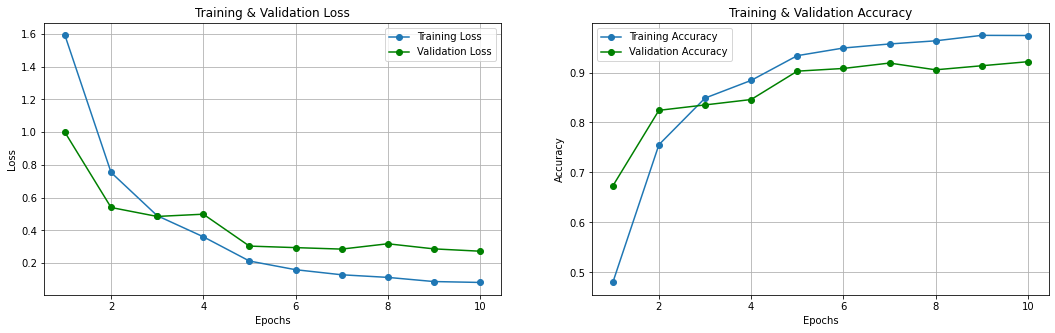

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [19]:
#Affichage des courbes accuracy et Loss
loss_vals = history.history['loss']
val_loss_vals = history.history['val_loss']
epochs = range(1, len(history.history['accuracy'])+1)

f, ax = plt.subplots(nrows=1,ncols=2,figsize=(18,5))
    
ax[0].plot(epochs, loss_vals,  marker='o', label='Training Loss')
ax[0].plot(epochs, val_loss_vals, marker='o', color = 'green', label='Validation Loss')
ax[0].set_title('Training & Validation Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].legend(loc='best')
ax[0].grid(True)

acc_vals = history.history['accuracy']
val_acc_vals = history.history['val_accuracy']

ax[1].plot(epochs, acc_vals, marker='o', label='Training Accuracy')
ax[1].plot(epochs, val_acc_vals, marker='o', color = 'green', label='Validation Accuracy')
ax[1].set_title('Training & Validation Accuracy')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].legend(loc='best')
ax[1].grid(True)

plt.show()
f.savefig('LossAndAccuracy.eps', format='eps')
plt.close()
del loss_vals, val_loss_vals, epochs, acc_vals, val_acc_vals

In [1]:
from keras.models import load_model
model = load_model('model_vgg16.h5')

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen_test = ImageDataGenerator(rescale=1./255, samplewise_center = True)

In [3]:
test_generator=datagen_test.flow_from_directory("Dataset/Test",
                                               target_size=(224,224),
                                                batch_size=128,
                                                class_mode='categorical')

Found 5928 images belonging to 14 classes.


In [ ]:
test_loss, test_acc=model.evaluate(test_generator)

    309/Unknown - 17134s 55s/step - loss: 0.3933 - accuracy: 0.9072

In [ ]:
Y_pred=model.predict_generator(test_generator)

C:\Users\pchelpTN\anaconda3\lib\site-packages\keras\engine\training.py:1976: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [ ]:
from sklearn.metrics import classification_report
print('classification report')
print(classification_report(test_generator.classes,Y_pred))